# ライブラリのインポート

In [107]:
import random

import pymc as pm
import arviz as az
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 日本語化対応
import japanize_matplotlib
#日本語フォント設定
sns.set(font="IPAexGothic")

from sklearn.datasets import load_iris

random.seed(42)

In [2]:
model = pm.Model()

In [3]:
with model:
    x = pm.Binomial('x', p=0.5, n=5)

In [4]:
with model:
    prior_samples = pm.sample_prior_predictive(random_seed=42)

Sampling: [x]


In [5]:
az.summary(prior_samples)

arviz - WARNING - Shape validation failed: input_shape: (1, 500), minimum_shape: (chains=2, draws=4)


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
x,2.522,1.103,1.0,4.0,0.061,0.044,330.0,533.0,NaN


In [6]:
prior_samples['prior']['x'].values

array([[4, 4, 4, 2, 4, 1, 5, 3, 1, 2, 3, 1, 2, 4, 2, 1, 4, 0, 3, 3, 1, 2,
        3, 4, 1, 3, 1, 3, 3, 3, 2, 3, 1, 3, 3, 3, 0, 4, 3, 1, 2, 4, 3, 1,
        3, 3, 2, 1, 1, 3, 3, 2, 2, 4, 4, 3, 4, 3, 4, 3, 5, 4, 3, 2, 3, 3,
        3, 1, 1, 2, 1, 2, 1, 1, 3, 3, 2, 3, 3, 4, 1, 1, 3, 3, 2, 2, 2, 2,
        3, 3, 2, 2, 1, 3, 2, 0, 3, 4, 2, 2, 2, 3, 2, 4, 4, 4, 1, 4, 5, 3,
        1, 4, 3, 3, 1, 3, 3, 2, 2, 3, 2, 3, 3, 4, 4, 1, 3, 3, 4, 3, 3, 4,
        3, 5, 3, 3, 3, 2, 4, 3, 3, 2, 3, 3, 3, 4, 1, 4, 2, 4, 3, 1, 4, 4,
        3, 4, 2, 3, 5, 2, 0, 3, 2, 2, 2, 3, 0, 0, 2, 1, 2, 4, 1, 2, 3, 2,
        3, 3, 3, 3, 2, 1, 3, 2, 2, 4, 2, 3, 3, 2, 2, 2, 1, 3, 1, 1, 3, 2,
        3, 1, 3, 4, 3, 2, 2, 2, 2, 1, 2, 2, 2, 4, 4, 2, 2, 4, 3, 2, 3, 2,
        0, 3, 3, 4, 3, 3, 4, 2, 3, 3, 2, 3, 3, 1, 4, 3, 1, 3, 2, 4, 4, 3,
        4, 1, 5, 2, 3, 2, 2, 3, 3, 4, 2, 1, 2, 4, 2, 2, 3, 1, 3, 3, 4, 2,
        2, 4, 2, 2, 2, 4, 2, 1, 3, 2, 4, 2, 2, 3, 1, 2, 1, 2, 1, 4, 3, 5,
        1, 3, 3, 2, 1, 4, 2, 1, 1, 2, 

# 基本動作

## ベルヌーイ分布

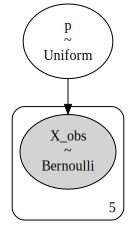

In [13]:
X = np.array([1, 0, 0, 1, 0])

model = pm.Model()

with model:
    p = pm.Uniform('p', lower=0, upper=1)

    X_obs = pm.Bernoulli('X_obs', p=p, observed=X)

pm.model_to_graphviz(model)

In [14]:
with model:
    iter_1 = pm.sample(
        chains=3,
        tune=2000,
        draws=2000,
        random_seed=42
    )

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (3 chains in 3 jobs)
NUTS: [p]


Output()

Sampling 3 chains for 2_000 tune and 2_000 draw iterations (6_000 + 6_000 draws total) took 1 seconds.
We recommend running at least 4 chains for robust computation of convergence diagnostics


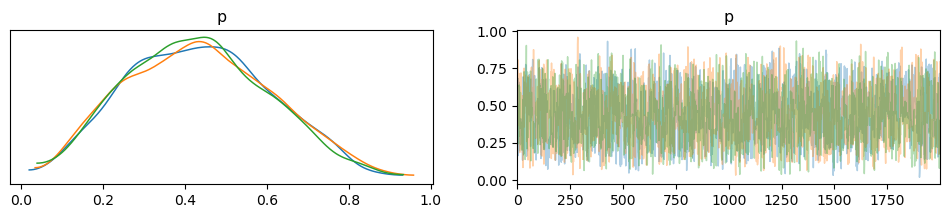

In [18]:
az.plot_trace(iter_1, compact=False)
plt.show()

<Axes: title={'center': 'p'}>

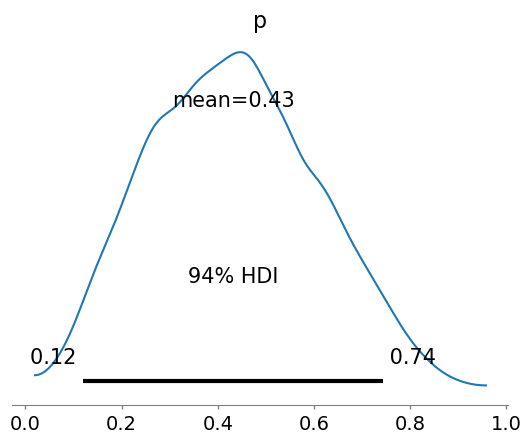

In [19]:
az.plot_posterior(iter_1)

In [21]:
az.summary(iter_1)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
p,0.433,0.173,0.12,0.744,0.004,0.002,2429.0,3883.0,1.0


## ２項分布

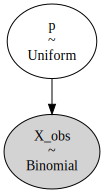

In [25]:
model_2 = pm.Model()

with model_2:
    p = pm.Uniform('p', lower=0, upper=1)
    X_obs = pm.Binomial('X_obs', p=p, n=5, observed=2)

pm.model_to_graphviz(model_2)

In [28]:
with model_2:
    iter_2 = pm.sample(
        chains=3,
        tune=2000,
        draws=2000,
        random_seed=42
    )


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (3 chains in 3 jobs)
NUTS: [p]


Output()

Sampling 3 chains for 2_000 tune and 2_000 draw iterations (6_000 + 6_000 draws total) took 1 seconds.
We recommend running at least 4 chains for robust computation of convergence diagnostics


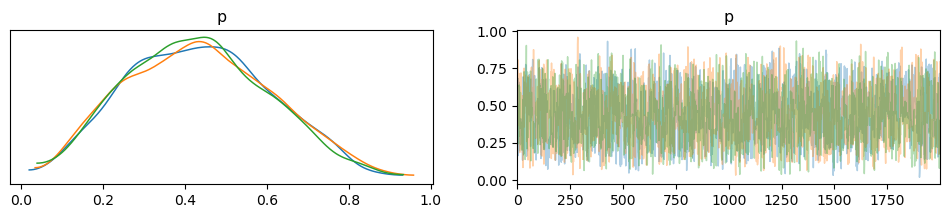

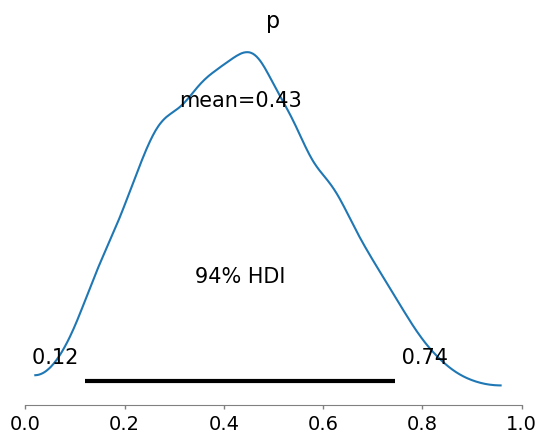

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
p,0.433,0.173,0.12,0.744,0.004,0.002,2429.0,3883.0,1.0


In [36]:
az.plot_trace(iter_2, compact=False)
plt.show()

plot = az.plot_posterior(iter_2)
plot.set_xlim(0, 1)
plt.show()

az.summary(iter_1)

## ２項分布の試行回数を増やす

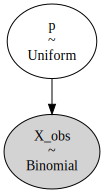

In [31]:
model_3 = pm.Model()

with model_3:
    p = pm.Uniform('p', lower=0, upper=1)
    X_obs = pm.Binomial('X_obs', p=p, n=50, observed=20)

pm.model_to_graphviz(model_3)

In [32]:
with model_3:
    iter_3 = pm.sample(
        chains=3,
        tune=2000,
        draws=2000,
        random_seed=42
    )

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (3 chains in 3 jobs)
NUTS: [p]


Output()

Sampling 3 chains for 2_000 tune and 2_000 draw iterations (6_000 + 6_000 draws total) took 1 seconds.
We recommend running at least 4 chains for robust computation of convergence diagnostics


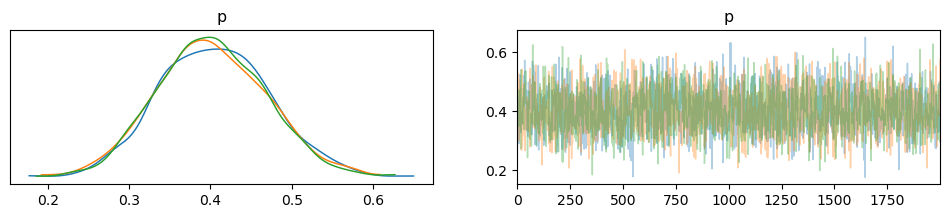

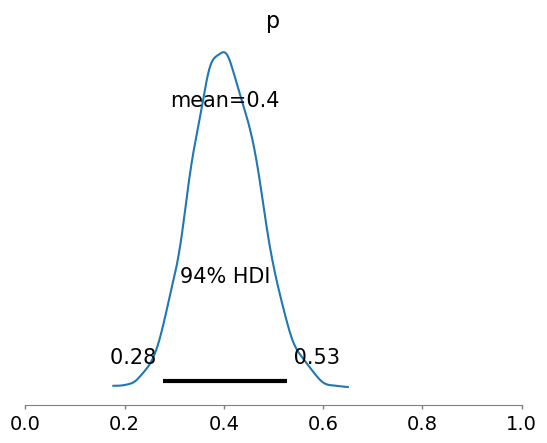

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
p,0.403,0.067,0.278,0.528,0.001,0.001,2459.0,3732.0,1.0


In [35]:
az.plot_trace(iter_3, compact=False)
plt.show()

plot = az.plot_posterior(iter_3)
plot.set_xlim(0, 1)
plt.show()

az.summary(iter_3)

## ２項分布 事前分布の変更

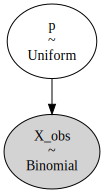

In [37]:
model_4 = pm.Model()

with model_4:
    p = pm.Uniform('p', lower=0.1, upper=0.9)
    X_obs = pm.Binomial('X_obs', p=p, n=5, observed=2)

pm.model_to_graphviz(model_4)

In [38]:
with model_4:
    iter_4 = pm.sample(
        chains=3,
        tune=2000,
        draws=2000,
        random_seed=42
    )

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (3 chains in 3 jobs)
NUTS: [p]


Output()

Sampling 3 chains for 2_000 tune and 2_000 draw iterations (6_000 + 6_000 draws total) took 1 seconds.
We recommend running at least 4 chains for robust computation of convergence diagnostics


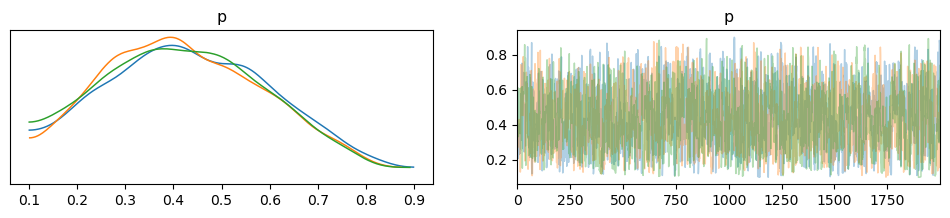

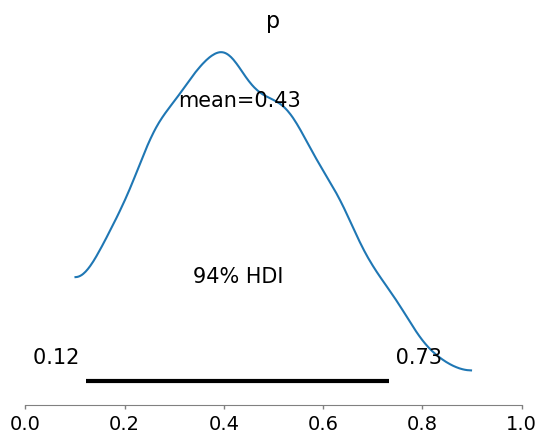

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
p,0.432,0.17,0.123,0.733,0.004,0.003,1750.0,1905.0,1.0


In [39]:
az.plot_trace(iter_4, compact=False)
plt.show()

plot = az.plot_posterior(iter_4)
plot.set_xlim(0, 1)
plt.show()

az.summary(iter_4)

## 事前分布をベータ分布にする

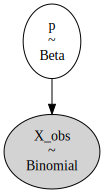

In [148]:
model_5 = pm.Model()

with model_5:
    p = pm.Beta('p', alpha=21, beta=31)
    X_obs = pm.Binomial('X_obs', p=p, n=5, observed=2)

pm.model_to_graphviz(model_5)

In [149]:
with model_5:
    iter_5 = pm.sample(
        chains=3,
        tune=2000,
        draws=2000,
        random_seed=42
    )

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (3 chains in 3 jobs)
NUTS: [p]


Output()

Sampling 3 chains for 2_000 tune and 2_000 draw iterations (6_000 + 6_000 draws total) took 1 seconds.
We recommend running at least 4 chains for robust computation of convergence diagnostics


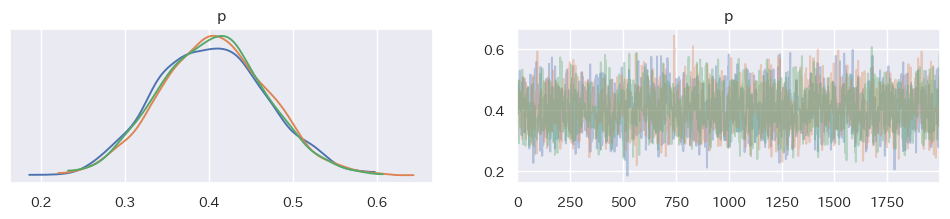

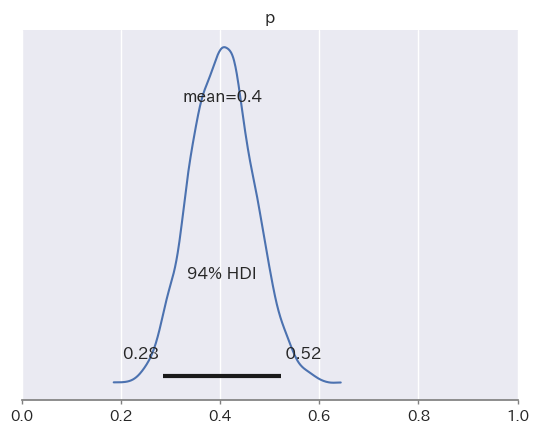

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
p,0.404,0.064,0.285,0.523,0.001,0.001,2383.0,3608.0,1.0


In [150]:
az.plot_trace(iter_5, compact=False)
plt.show()

plot = az.plot_posterior(iter_5)
plot.set_xlim(0, 1)
plt.show()

az.summary(iter_5)

# アイリスデータセットの分析

## データ分布のベイス推論

In [54]:
iris = load_iris()

df = pd.DataFrame(iris.data, columns=[c[:-5] for c in iris.feature_names])
df['species'] = iris.target
df.loc[df['species'] == 0, 'species'] = "setosa"
df.loc[df['species'] == 1, 'species'] = "versicolor"
df.loc[df['species'] == 2, 'species'] = "virginica"

df.head(2)

/tmp/ipykernel_119/2979051500.py:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'setosa' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df['species'] == 0, 'species'] = "setosa"


,sepal length,sepal width,petal length,petal width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa


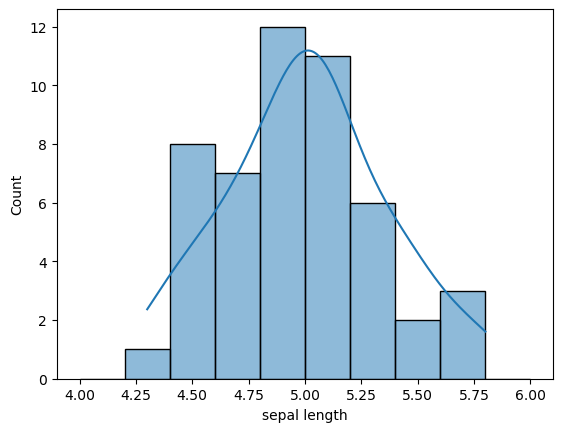

In [58]:
sns.histplot(df[df['species'] == 'setosa'], x='sepal length', bins=np.arange(4, 6.2, 0.2), kde=True)
plt.show()

### setosaのsepal lengthのモデリング

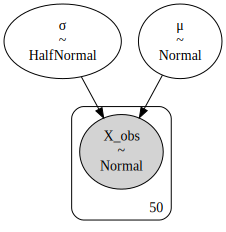

In [60]:
X = df[df['species'] == 'setosa']['sepal length'].values

model_1 = pm.Model()

with model_1:
    mu = pm.Normal('μ', mu=0, sigma=10)
    sigma = pm.HalfNormal('σ', sigma=10)
    X_obs = pm.Normal('X_obs', mu=mu, sigma=sigma, observed=X)

pm.model_to_graphviz(model_1)

In [62]:
with model_1:
    iter_1 = pm.sample(random_seed=42)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [μ, σ]


Output()

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 1 seconds.


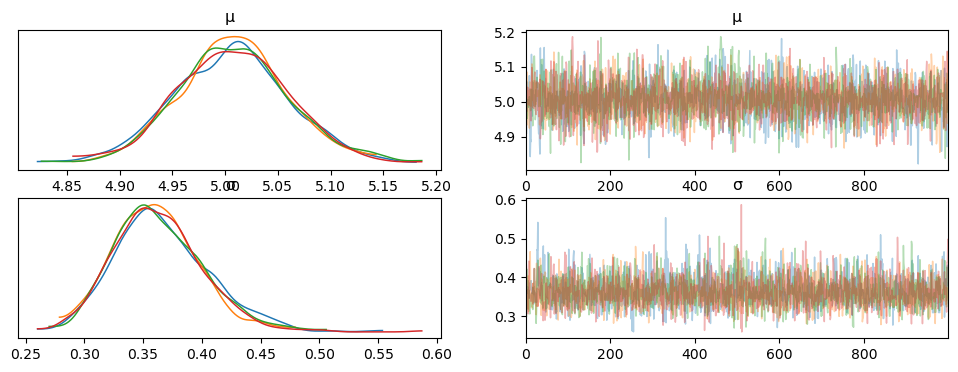

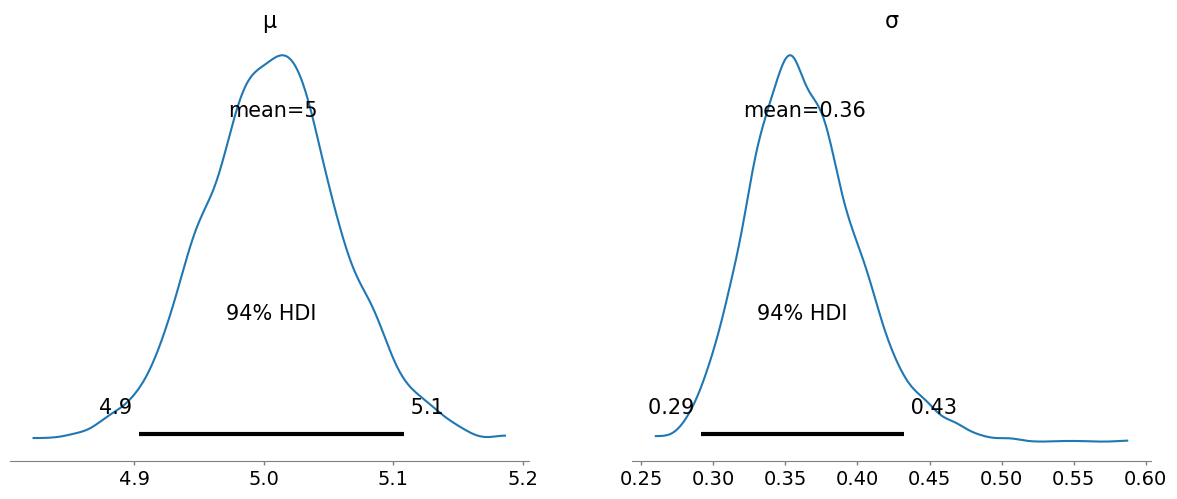

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
μ,5.007,0.054,4.903,5.108,0.001,0.001,4007.0,2306.0,1.0
σ,0.363,0.038,0.291,0.432,0.001,0.000,3580.0,2688.0,1.0


In [65]:
az.plot_trace(iter_1, compact=False)
plt.show()

plot = az.plot_posterior(iter_1)
plt.show()

az.summary(iter_1)

## 線形回帰のベイズ推論

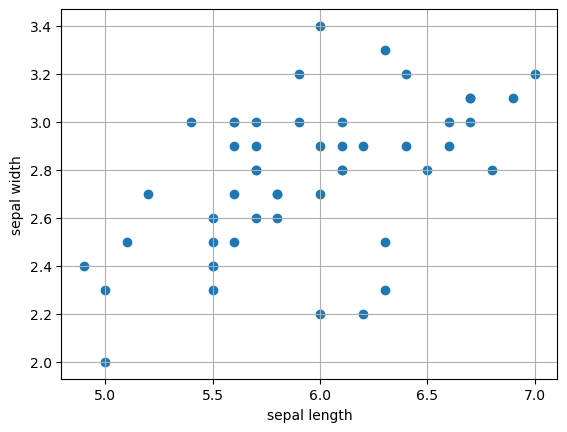

In [73]:
df_versicolor = df[df['species'] == 'versicolor']
df_versicolor.head(2)

X = df_versicolor['sepal length'].values
Y = df_versicolor['sepal width'].values

plt.scatter(X, Y)
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.grid()
plt.show()

/opt/conda/lib/python3.11/site-packages/pymc/data.py:287: FutureWarning: ConstantData is deprecated. All Data variables are now mutable. Use Data instead.
  warnings.warn(


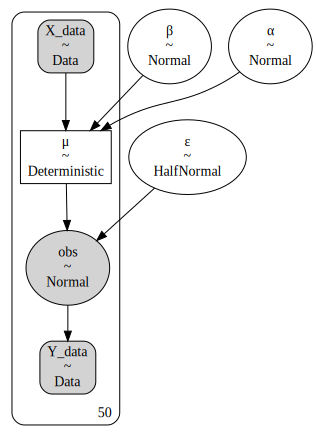

In [76]:
model_2 = pm.Model()

# with model_2:
#     alpha = pm.Normal('α', mu=0, sigma=10)
#     beta = pm.Normal('β', mu=0, sigma=10)

#     mu = alpha * X + beta

#     epsilon = pm.HalfNormal('ε', sigma=1)

#     Y_obs = pm.Normal('Y_obs', mu=mu, sigma=epsilon, observed=Y)

with model_2:
    X_data = pm.ConstantData('X_data', X)
    Y_data = pm.ConstantData('Y_data', Y)

    alpha = pm.Normal('α', mu=0, sigma=10)
    beta = pm.Normal('β', mu=0, sigma=10)

    mu = pm.Deterministic('μ', alpha * X_data + beta)

    epsilon = pm.HalfNormal('ε', sigma=1)

    obs = pm.Normal('obs', mu=mu, sigma=epsilon, observed=Y_data)

pm.model_to_graphviz(model_2)

In [77]:
with model_2:
    iter_2 = pm.sample(random_seed=42)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [α, β, ε]


Output()

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 4 seconds.


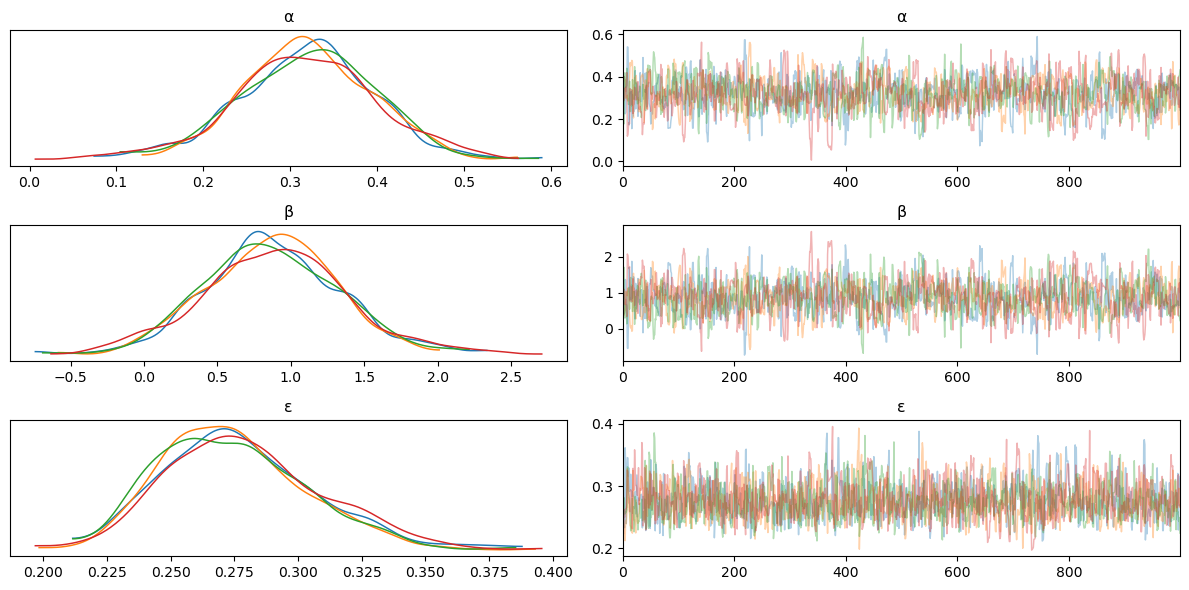

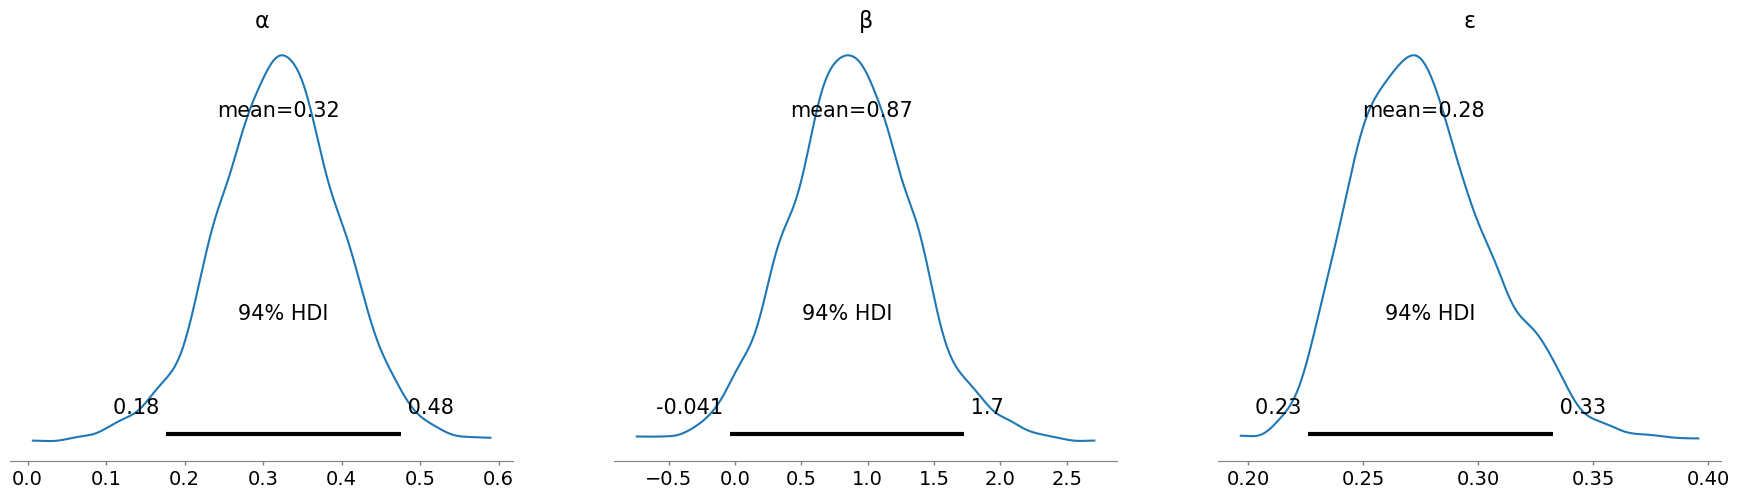

In [82]:
az.plot_trace(iter_2, compact=False, var_names=['α', 'β', 'ε'])
plt.tight_layout()
plt.show()

plot = az.plot_posterior(iter_2, var_names=['α', 'β', 'ε'])
plt.show()


### 散布図と回帰直線の重ね書き

In [84]:
x_values = np.array([X.min()-0.1, X.max()+0.1])

alpha2 = iter_2['posterior']['α'].values.reshape(-1, 1)
beta2 = iter_2['posterior']['β'].values.reshape(-1, 1)

y_preds = x_values * alpha2 + beta2

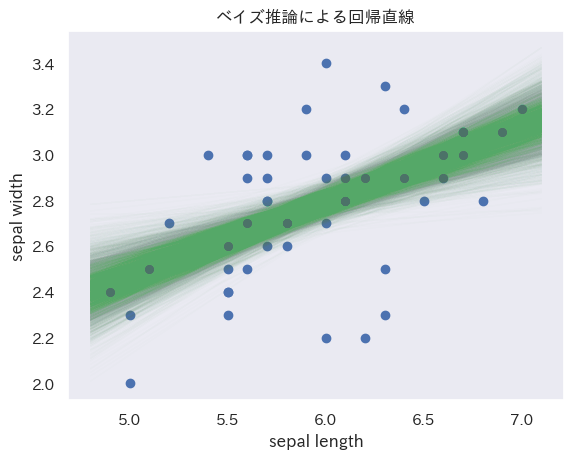

In [94]:
for y_pred in y_preds:
    plt.plot(x_values, y_pred, lw=1, alpha=0.01, c='g')

plt.scatter(X, Y)
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.title('ベイズ推論による回帰直線')
plt.grid()
plt.show()

## 階層ベイズモデル

In [96]:
df.head(1)

,sepal length,sepal width,petal length,petal width,species
0,5.1,3.5,1.4,0.2,setosa


In [112]:
df_0 = df[df['species'] == 'setosa']
df_1 = df[df['species'] == 'versicolor']
df_2 = df[df['species'] == 'virginica']

sample_indexs = random.sample(range(len(df_0)), 3)

df_selected = pd.concat([
    df_0.iloc[sample_indexs],
    df_1.iloc[sample_indexs],
    df_2.iloc[sample_indexs],
])

df_selected

,sepal length,sepal width,petal length,petal width,species
40,5.0,3.5,1.3,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
90,5.5,2.6,4.4,1.2,versicolor
57,4.9,2.4,3.3,1.0,versicolor
51,6.4,3.2,4.5,1.5,versicolor
140,6.7,3.1,5.6,2.4,virginica
107,7.3,2.9,6.3,1.8,virginica
101,5.8,2.7,5.1,1.9,virginica


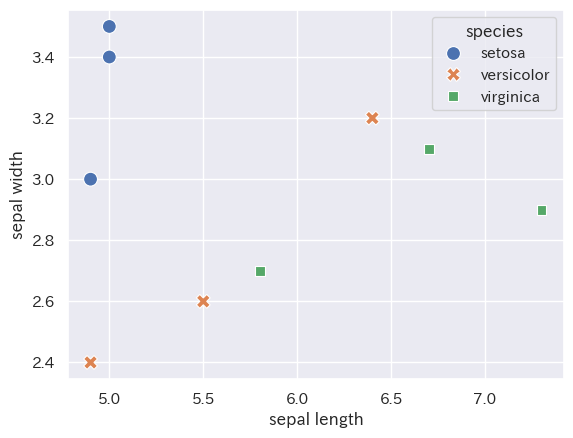

In [115]:
sns.scatterplot(
    x='sepal length',
    y='sepal width',
    hue='species',
    style='species',
    data=df_selected,
    s=100
)

plt.show()

### ベイズ推論用のデータ作成

In [120]:
X = df_selected['sepal length'].values
Y = df_selected['sepal width'].values
species = df_selected['species']
cl = pd.Categorical(species).codes

print(X)
print(Y)
print(species.values)
print(cl)

[5.  5.  4.9 5.5 4.9 6.4 6.7 7.3 5.8]
[3.5 3.4 3.  2.6 2.4 3.2 3.1 2.9 2.7]
['setosa' 'setosa' 'setosa' 'versicolor' 'versicolor' 'versicolor'
 'virginica' 'virginica' 'virginica']
[0 0 0 1 1 1 2 2 2]


/opt/conda/lib/python3.11/site-packages/pymc/data.py:287: FutureWarning: ConstantData is deprecated. All Data variables are now mutable. Use Data instead.
  warnings.warn(


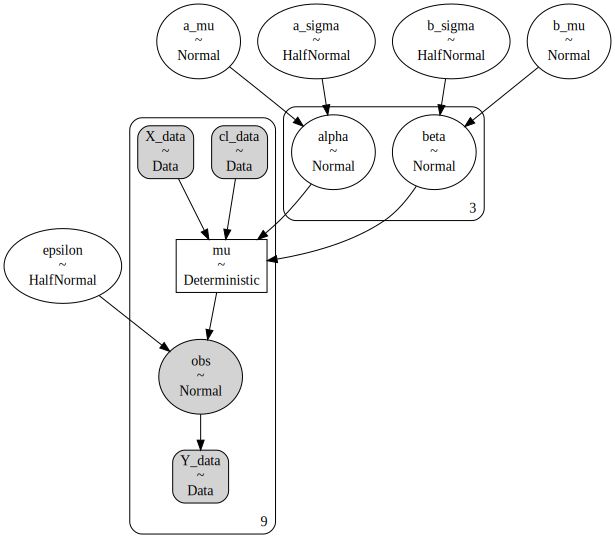

In [125]:
model_1 = pm.Model()


with model_1:
    X_data = pm.ConstantData('X_data', X)
    Y_data = pm.ConstantData('Y_data', Y)
    cl_data = pm.ConstantData('cl_data', cl)

    a_mu = pm.Normal('a_mu', mu=0, sigma=10)
    a_sigma = pm.HalfNormal('a_sigma', sigma=10)
    alpha = pm.Normal('alpha', mu=a_mu, sigma=a_sigma, shape=(3,))

    b_mu = pm.Normal('b_mu', mu=0, sigma=10)
    b_sigma = pm.HalfNormal('b_sigma', sigma=10)
    beta = pm.Normal('beta', mu=b_mu, sigma=b_sigma, shape=(3,))

    epsilon = pm.HalfNormal('epsilon', sigma=1)

    mu = pm.Deterministic('mu', X_data * alpha[cl_data] + beta[cl_data])

    obs = pm.Normal('obs', mu=mu, sigma=epsilon, observed=Y_data)


pm.model_to_graphviz(model_1)

In [126]:
with model_1:
    iter_1 = pm.sample(random_seed=42, target_accept=0.998)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [a_mu, a_sigma, alpha, b_mu, b_sigma, beta, epsilon]


Output()

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 86 seconds.
There were 19 divergences after tuning. Increase `target_accept` or reparameterize.
Chain 0 reached the maximum tree depth. Increase `max_treedepth`, increase `target_accept` or reparameterize.
Chain 3 reached the maximum tree depth. Increase `max_treedepth`, increase `target_accept` or reparameterize.
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details


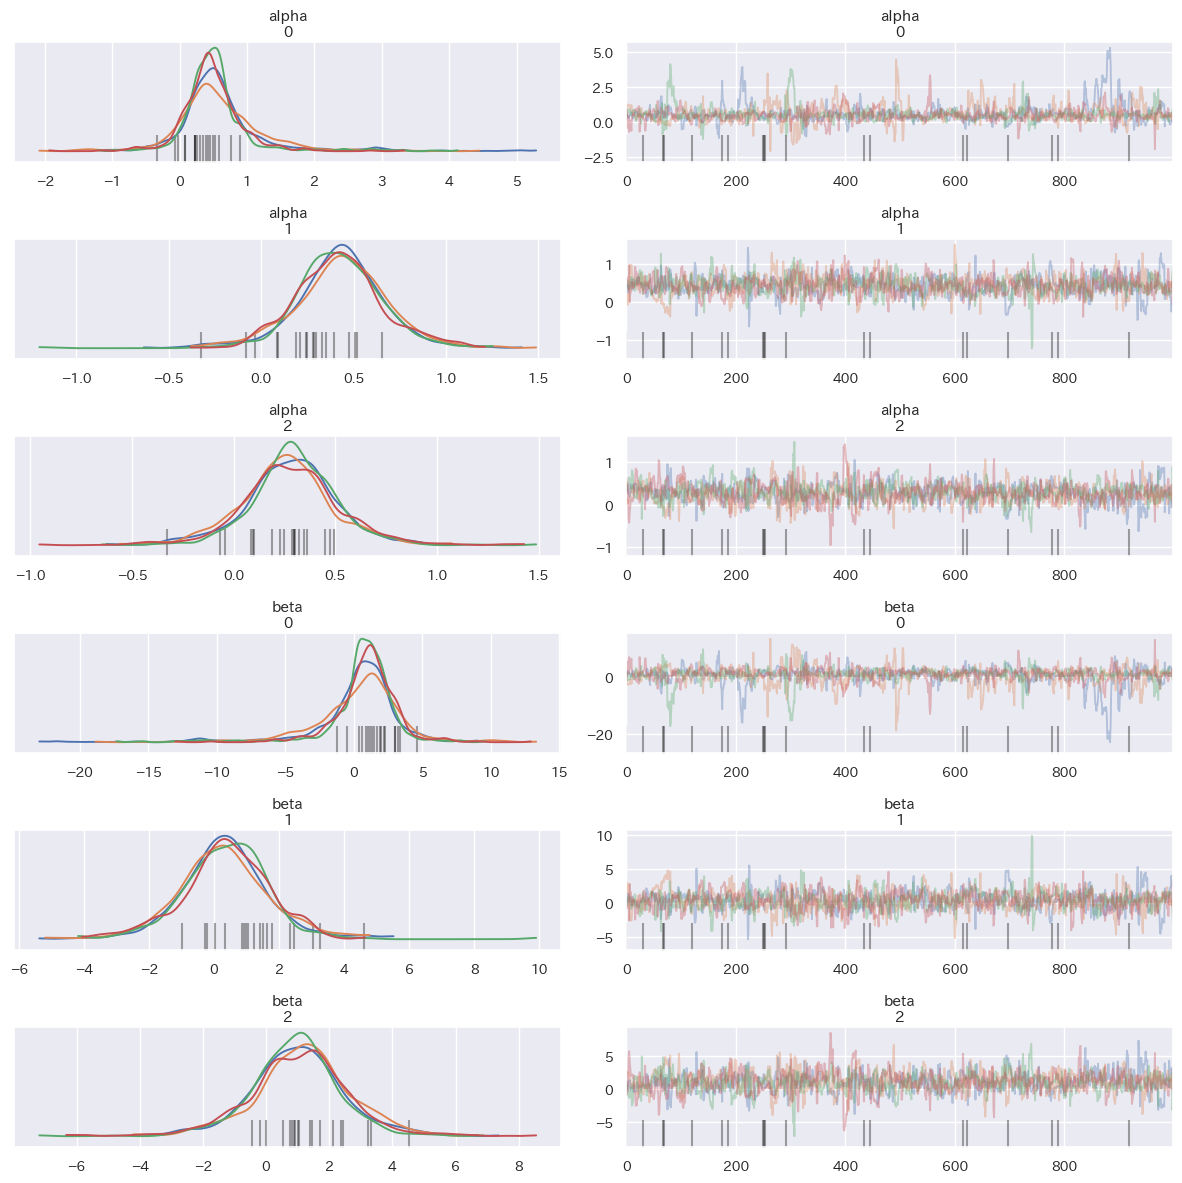

In [129]:
az.plot_trace(iter_1, compact=False, var_names=['alpha', 'beta'])
plt.tight_layout()
plt.show()

In [136]:
summary = az.summary(iter_1, var_names=['alpha', 'beta'])
summary

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
alpha[0],0.554,0.591,-0.455,1.661,0.030,0.026,577.0,340.0,1.02
alpha[1],0.428,0.241,-0.042,0.887,0.009,0.006,724.0,778.0,1.01
alpha[2],0.283,0.228,-0.161,0.717,0.008,0.006,764.0,932.0,1.01
beta[0],0.540,2.930,-5.310,5.110,0.149,0.121,582.0,347.0,1.02
beta[1],0.345,1.366,-2.242,2.990,0.050,0.036,717.0,835.0,1.01
beta[2],1.031,1.506,-1.794,4.039,0.054,0.047,763.0,983.0,1.01


In [141]:
means = summary['mean']
alpha_0 = means['alpha[0]']
alpha_1 = means['alpha[1]']
alpha_2 = means['alpha[2]']
beta_0 = means['beta[0]']
beta_1 = means['beta[1]']
beta_2 = means['beta[2]']

x_range = np.array([X.min()-0.1, X.max()+0.1])
y0_range = alpha_0 * x_range + beta_0
y1_range = alpha_1 * x_range + beta_1
y2_range = alpha_2 * x_range + beta_2

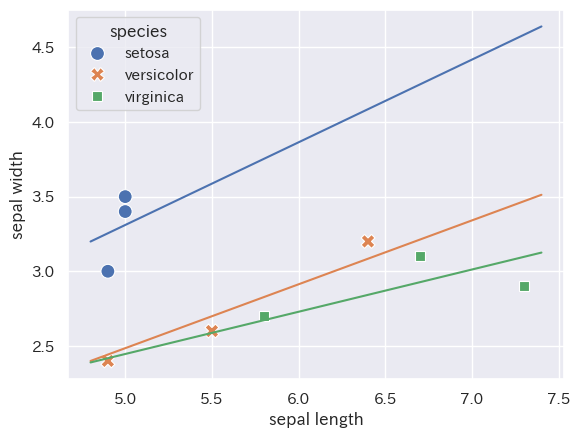

In [142]:
sns.scatterplot(
    x='sepal length',
    y='sepal width',
    hue='species',
    style='species',
    data=df_selected,
    s=100
)

plt.plot(x_range, y0_range, label='setosa')
plt.plot(x_range, y1_range, label='versicolor')
plt.plot(x_range, y2_range, label='virginica')

plt.show()

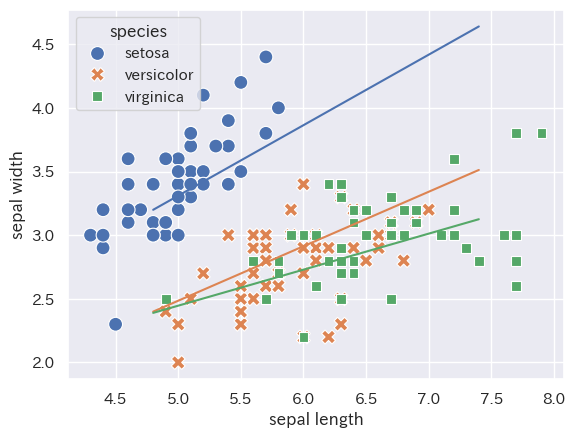

In [143]:
sns.scatterplot(
    x='sepal length',
    y='sepal width',
    hue='species',
    style='species',
    data=df,
    s=100
)

plt.plot(x_range, y0_range, label='setosa')
plt.plot(x_range, y1_range, label='versicolor')
plt.plot(x_range, y2_range, label='virginica')

plt.show()

## 潜在変数モデル

In [171]:
df_selected = df[df['species'] != 'setosa']
df_selected = df_selected.reset_index(drop=True)
X = df_selected['petal width'].values

/opt/conda/lib/python3.11/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.11/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.11/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.11/site-packages/seaborn/_base.py:948: FutureWarning: When 

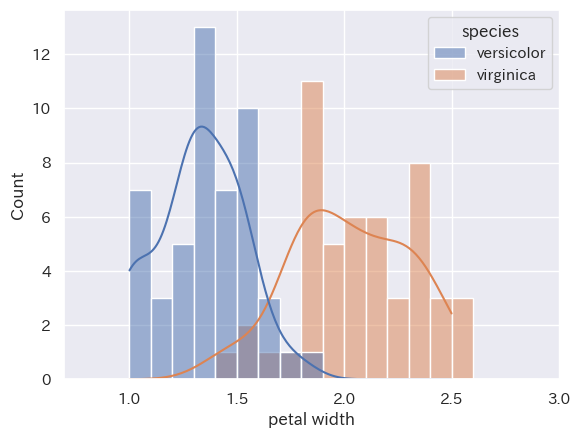

In [172]:
bins = np.arange(0.8, 3, 0.1)
fig, ax = plt.subplots()
sns.histplot(bins=bins, data=df_selected, kde=True, x='petal width', hue='species')
plt.show()

/opt/conda/lib/python3.11/site-packages/pymc/data.py:287: FutureWarning: ConstantData is deprecated. All Data variables are now mutable. Use Data instead.
  warnings.warn(


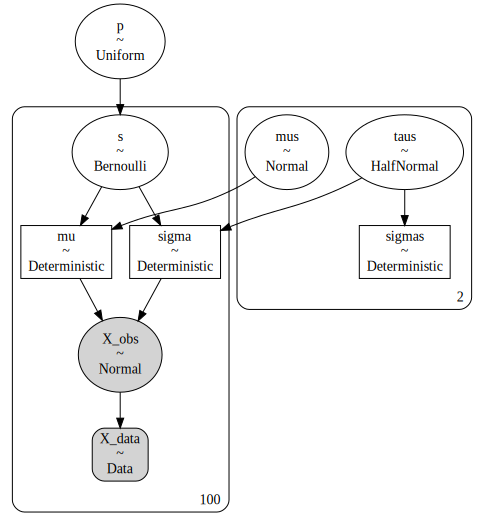

In [183]:
# 何種類の正規分布モデルがあるか
n_components = 2

# 観測データ件数(50件 × 2種類)
N = X.shape # (100, )

model_1 = pm.Model()

with model_1:
    # Xの観測値をConstantDataで定義
    X_data = pm.ConstantData('X_data', X)

    # p: 潜在変数が1の値をとる確率
    p = pm.Uniform('p', lower=0, upper=1)

    # s: pの確率を元に 0 or 1 のどちらかの値を返す
    s = pm.Bernoulli('s', p=p, shape=N)

    # mus: 2つの花の種類ごとの平均値
    mus = pm.Normal('mus', mu=0, sigma=10, shape=n_components)  #  musは２つの要素を持つ配列、どちらを使うかは潜在変数:sに値によって決まる

    # taus: 2つの花の種類ごとの"ばらつき". τ=1/σ^2
    taus = pm.HalfNormal('taus', sigma=10, shape=n_components)  # tausは２つの要素を持つ配列、どちらを使うかは潜在変数:sに値によって決まる
    
    # グラフ描画などの分析でsigmasが必要な為、tausからsigmasを求めておく。τ=1/σ^2
    sigmas = pm.Deterministic('sigmas', 1/pm.math.sqrt(taus))

    # 各観測値ごと(100個)に潜在変数からmuとtauを求めておく
    mu = pm.Deterministic('mu', mus[s])
    tau = pm.Deterministic('sigma', taus[s])  # τ=1/σ^2

    # 正規分布に従う確率変数X_obsの定義
    X_obs = pm.Normal('X_obs', mu=mu, tau=tau, observed=X_data)

pm.model_to_graphviz(model_1)

In [184]:
with model_1:
    iter_1 = pm.sample(chains=1, draws=3000, target_accept=0.99, random_seed=42)

Sequential sampling (1 chains in 1 job)
CompoundStep
>NUTS: [p, mus, taus]
>BinaryGibbsMetropolis: [s]


Output()

Sampling 1 chain for 1_000 tune and 3_000 draw iterations (1_000 + 3_000 draws total) took 13 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks


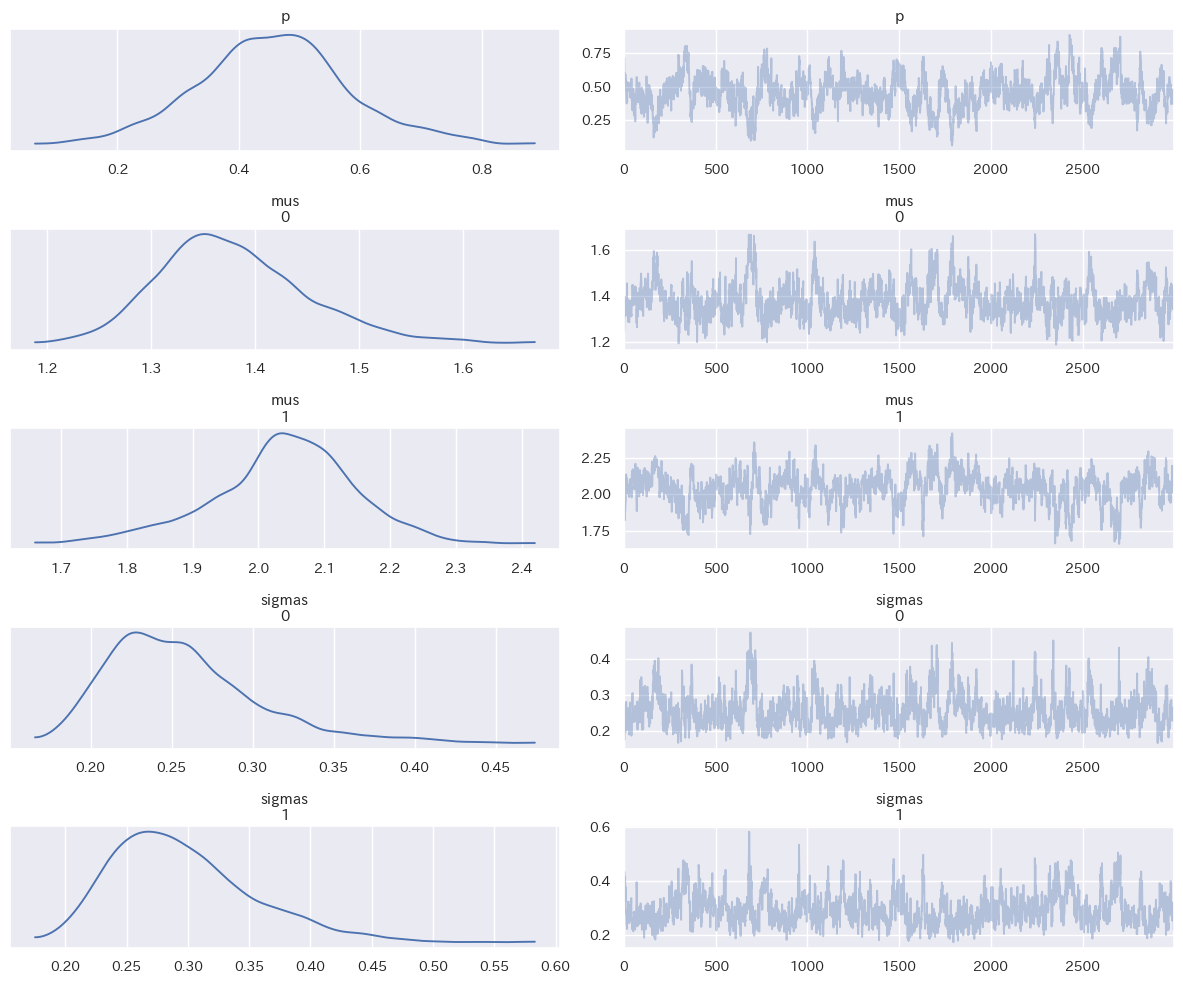

In [186]:
az.plot_trace(iter_1, var_names=['p', 'mus', 'sigmas'], compact=False)
plt.tight_layout()
plt.show()

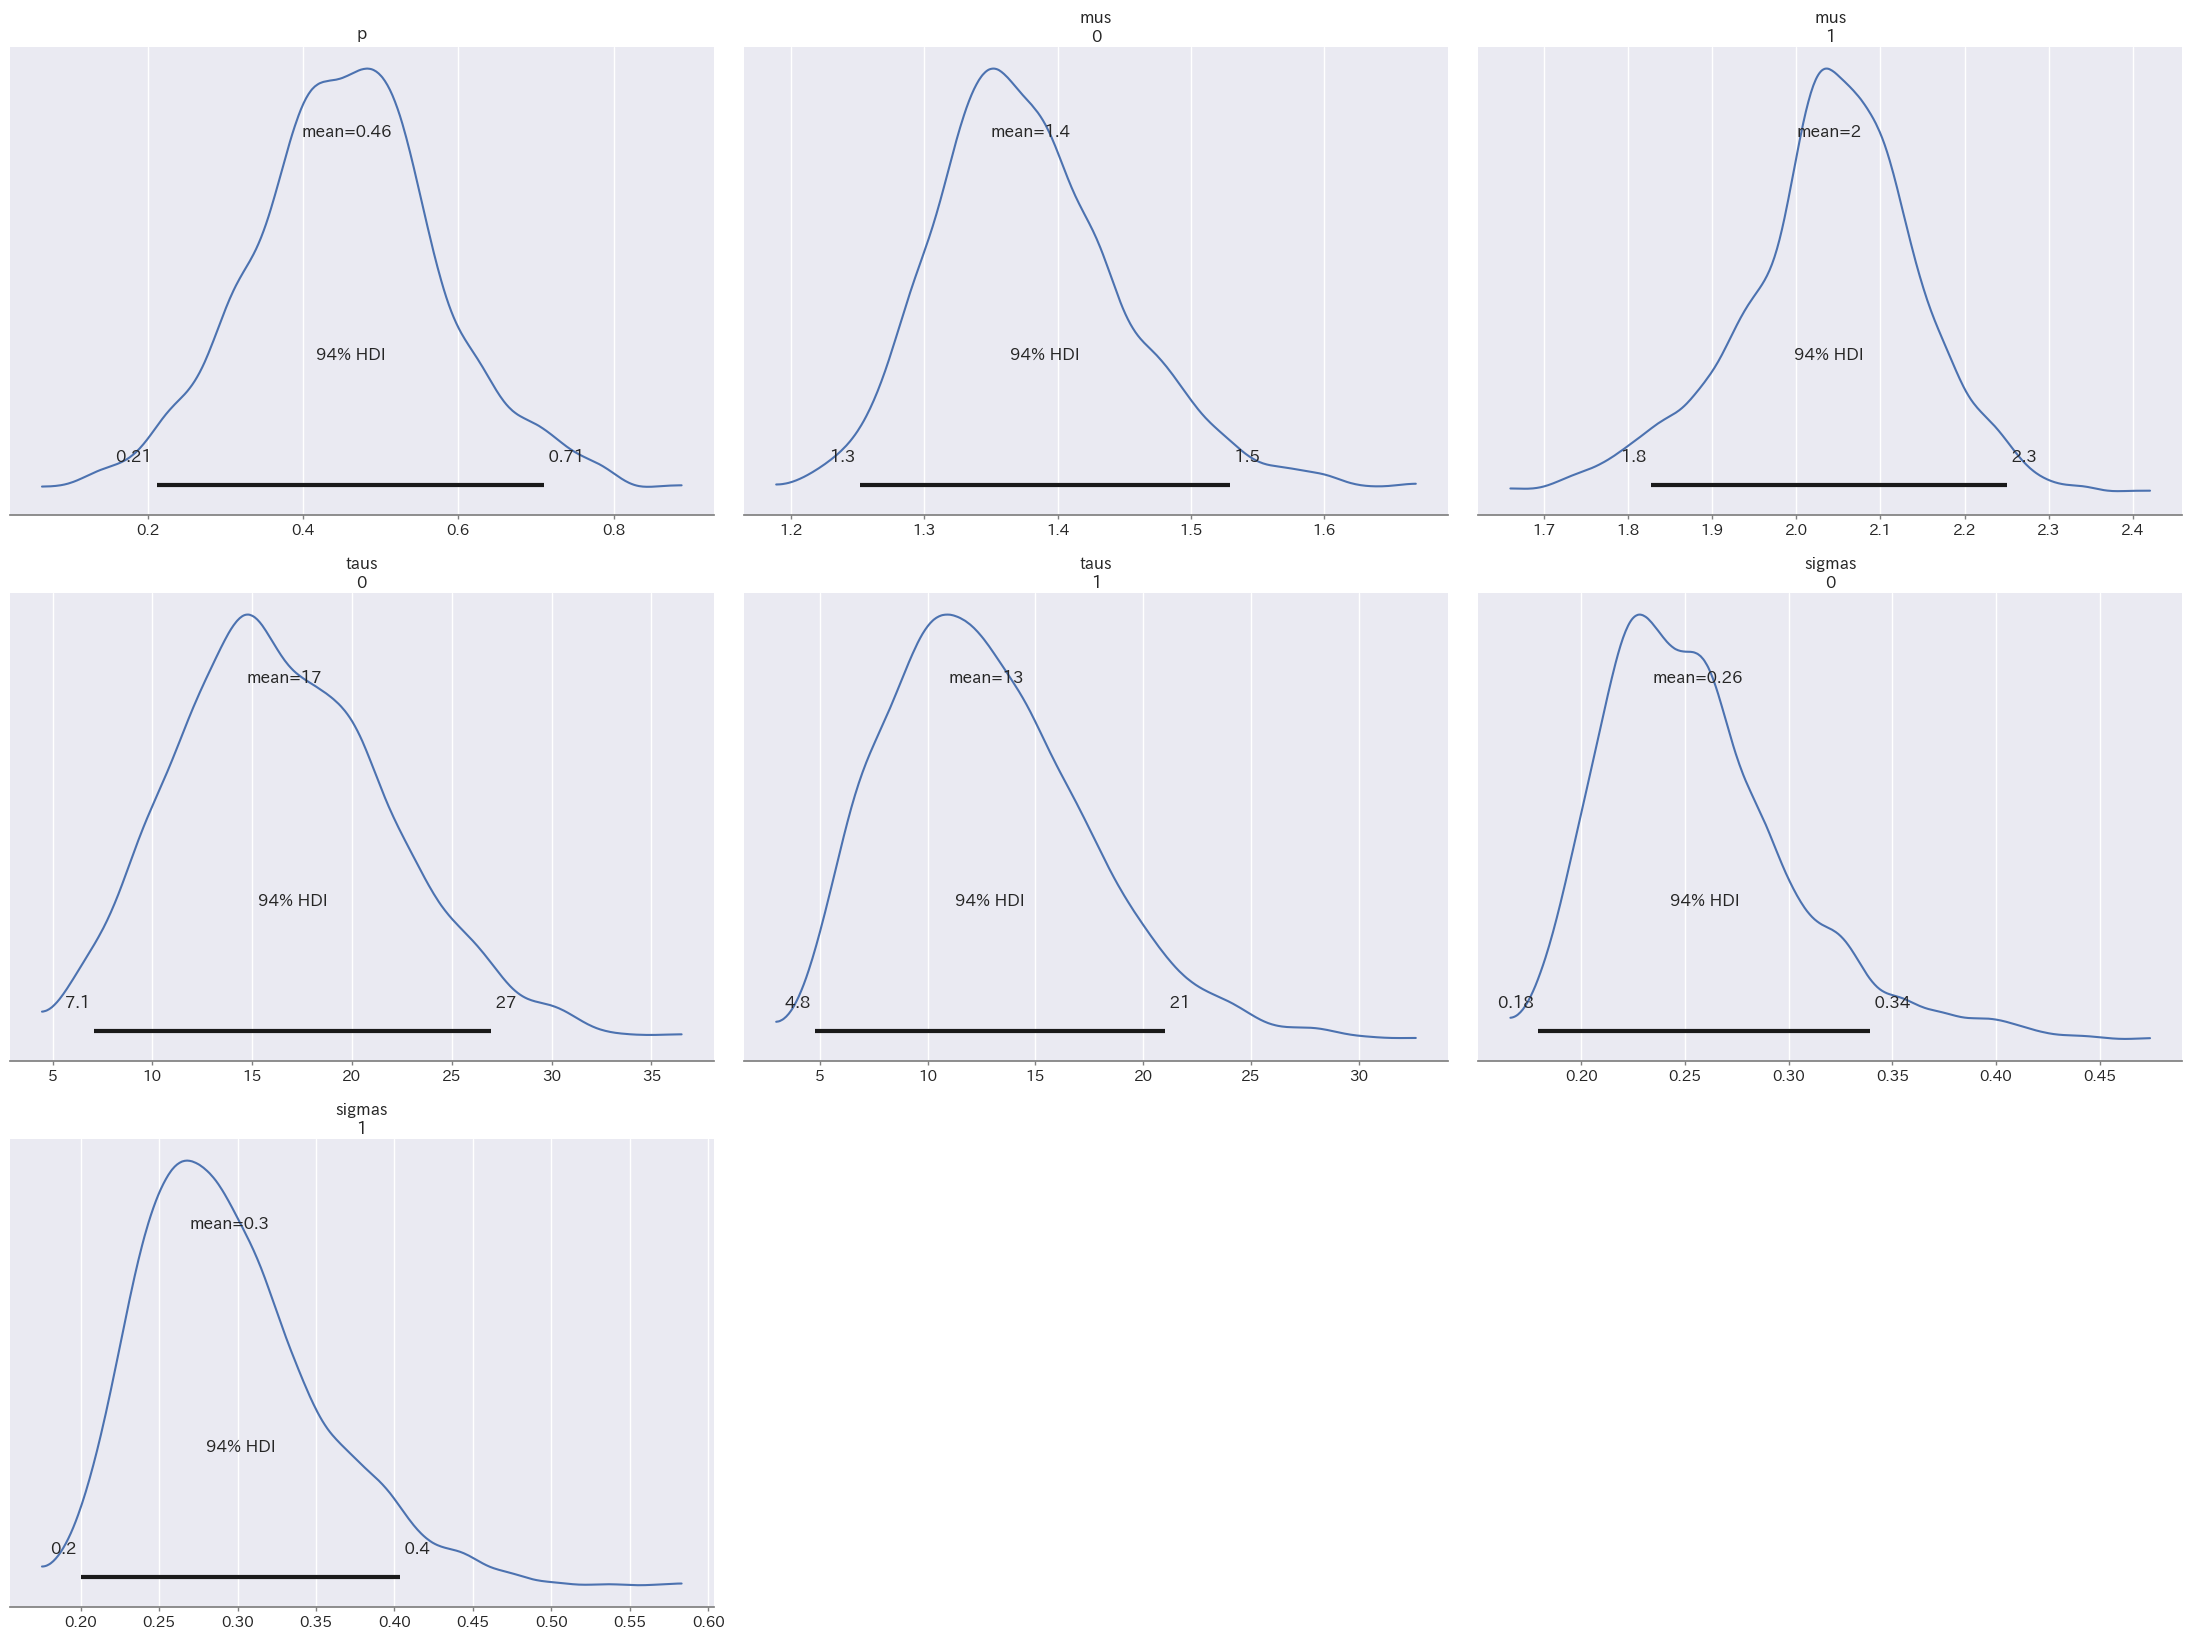

In [203]:
az.plot_posterior(iter_1, var_names=['p', 'mus',  'sigmas'])
plt.tight_layout()
plt.show()

In [192]:
summary = az.summary(iter_1, var_names=['p', 'mus', 'sigmas'])
summary

arviz - WARNING - Shape validation failed: input_shape: (1, 3000), minimum_shape: (chains=2, draws=4)


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
p,0.457,0.128,0.212,0.711,0.013,0.009,97.0,220.0,NaN
mus[0],1.380,0.075,1.251,1.529,0.007,0.005,132.0,150.0,NaN
mus[1],2.039,0.108,1.827,2.251,0.012,0.008,85.0,229.0,NaN
sigmas[0],0.256,0.046,0.179,0.339,0.004,0.003,178.0,268.0,NaN
sigmas[1],0.295,0.057,0.200,0.404,0.005,0.004,109.0,364.0,NaN


### ヒストグラムと正規分布の重ね書き

/opt/conda/lib/python3.11/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.11/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.11/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.11/site-packages/seaborn/_base.py:948: FutureWarning: When 

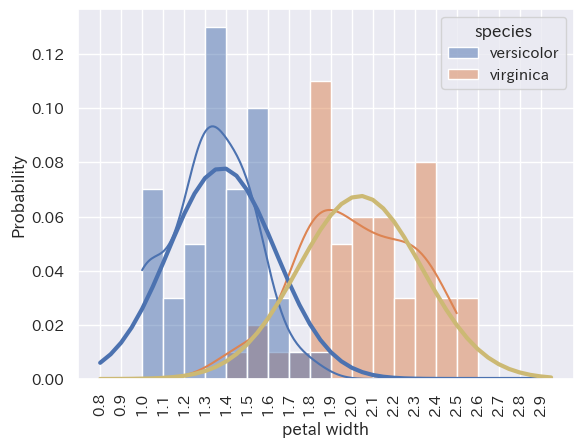

In [202]:
def norm(x, mu, sigma):
    return np.exp(-((x-mu)/sigma)**2/2) / (np.sqrt(2 * np.pi) * sigma)


mean = summary['mean']
mean_mu0 = mean['mus[0]']
mean_mu1 = mean['mus[1]']

mean_sigma0 = mean['sigmas[0]']
mean_sigma1 = mean['sigmas[1]']

x = np.arange(0.8, 3, 0.05)
delta = 0.1
y0 = norm(x, mean_mu0, mean_sigma0) * delta / n_components
y1 = norm(x, mean_mu1, mean_sigma1) * delta / n_components

bins = np.arange(0.8, 3.0, delta)
fig, ax = plt.subplots()
sns.histplot(data=df_selected, bins=bins, x='petal width', hue='species', kde=True, ax=ax, stat='probability')

ax.get_lines()[1].set_label('KDE versicolor')
ax.get_lines()[0].set_label('KDE virgnica')

ax.plot(x, y0, c='b', lw=3, label='Bayse versicolor')
ax.plot(x, y1, c='y', lw=3, label='Bayse virgnica')

ax.set_xticks(bins)
ax.xaxis.set_tick_params(rotation=90)

plt.show()